In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

import warnings
warnings.filterwarnings("ignore")

In [25]:
# Load the dataset
file_path = 'C:/Users/ARPIT SING/Documents/Credit+Card+Customer+Data.xlsx'
data = pd.read_excel(file_path)

In [26]:
# Display the first few rows
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [27]:
# Display the last few rows
data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [28]:
# Checking the shape of the dataset
data.shape

(660, 7)

In [29]:
# Checking the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [30]:
print(data.describe().T)

                     count          mean           std      min       25%  \
Sl_No                660.0    330.500000    190.669872      1.0    165.75   
Customer Key         660.0  55141.443939  25627.772200  11265.0  33825.25   
Avg_Credit_Limit     660.0  34574.242424  37625.487804   3000.0  10000.00   
Total_Credit_Cards   660.0      4.706061      2.167835      1.0      3.00   
Total_visits_bank    660.0      2.403030      1.631813      0.0      1.00   
Total_visits_online  660.0      2.606061      2.935724      0.0      1.00   
Total_calls_made     660.0      3.583333      2.865317      0.0      1.00   

                         50%       75%       max  
Sl_No                  330.5    495.25     660.0  
Customer Key         53874.5  77202.50   99843.0  
Avg_Credit_Limit     18000.0  48000.00  200000.0  
Total_Credit_Cards       5.0      6.00      10.0  
Total_visits_bank        2.0      4.00       5.0  
Total_visits_online      2.0      4.00      15.0  
Total_calls_made         3

In [31]:
# Checking for unique values
unique_counts = data.nunique()
unique_counts

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [32]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

In [33]:
# Checking for missing values
print("Missing Values")
print(data.isnull().sum())

Missing Values
Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


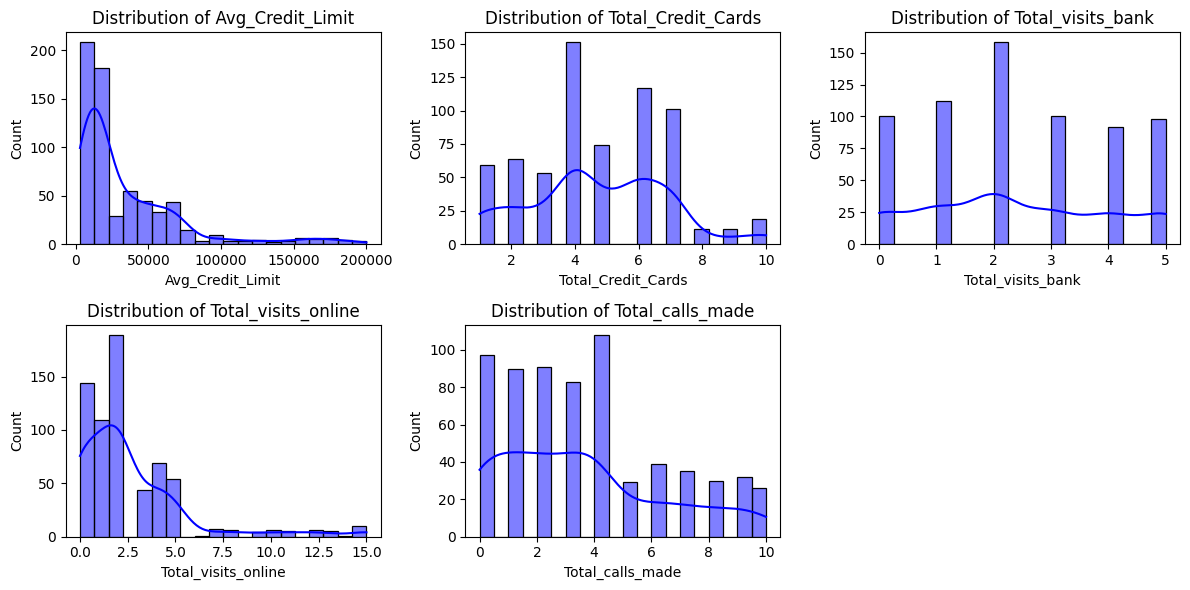

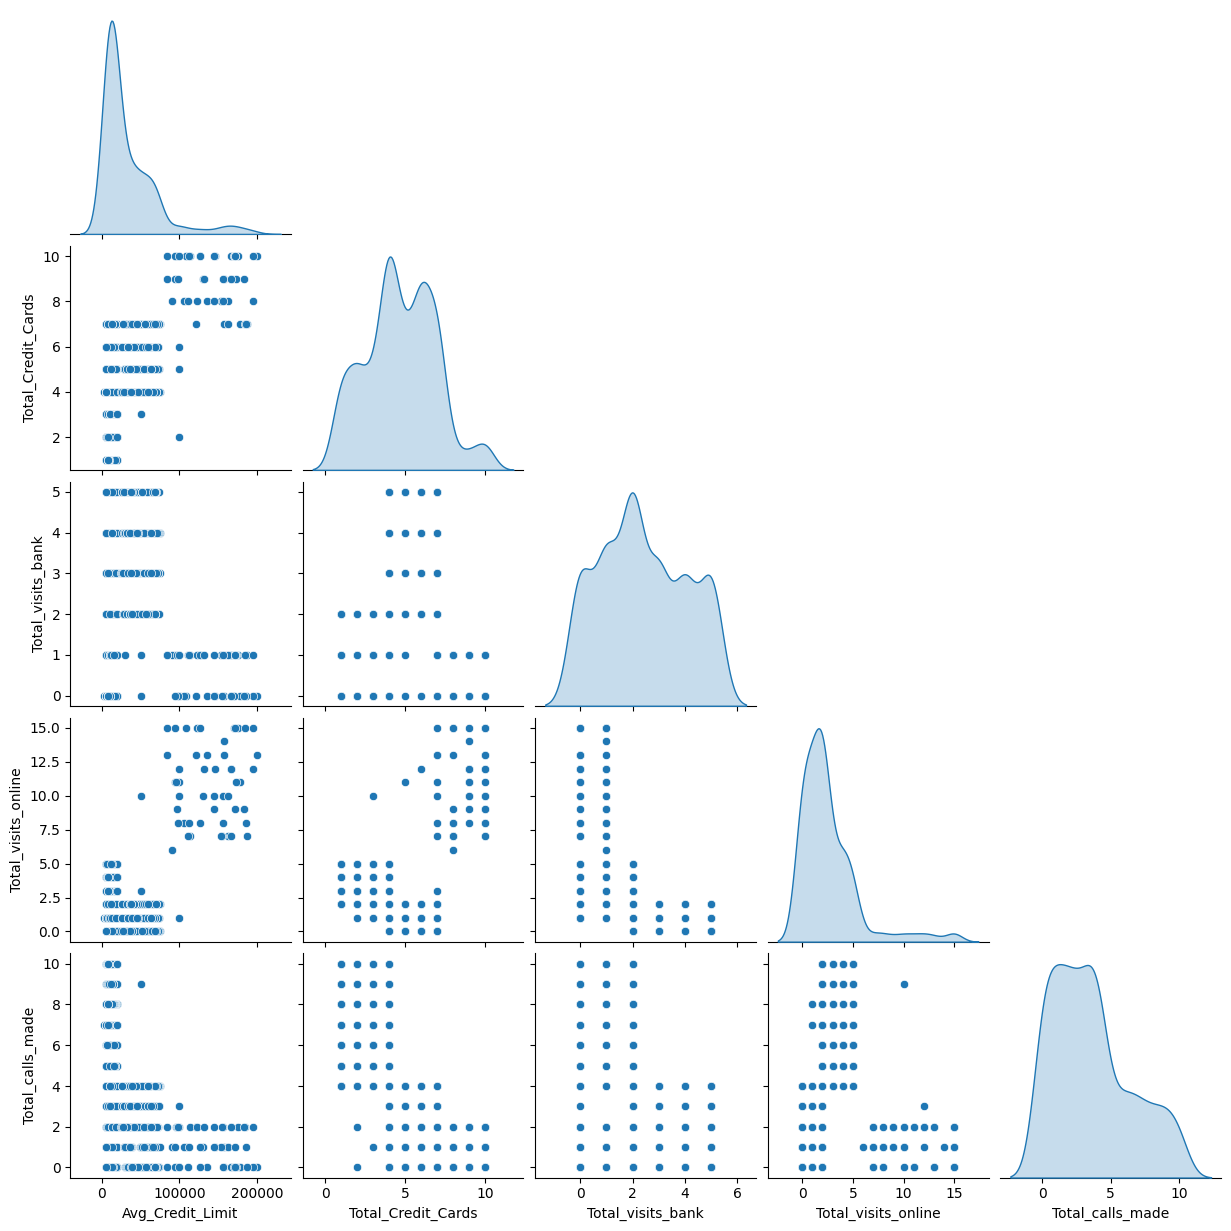

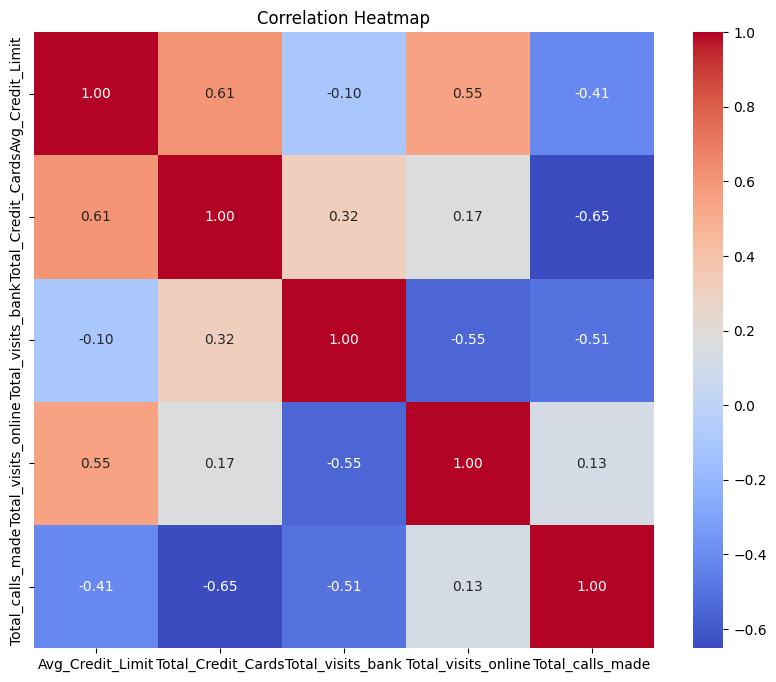

In [34]:
# Univariate Analysis
plt.figure(figsize=(12, 6))
for i, col in enumerate(data.columns[2:], 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True, bins=20, color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Bivariate Analysis
sns.pairplot(data.iloc[:, 2:], diag_kind='kde', corner=True)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.iloc[:, 2:].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [35]:
# Data Preprocessing
# Handling missing values (if any)
if data.isnull().sum().sum() > 0:
    data.fillna(data.median(), inplace=True)

# Outlier Detection and Treatment
# Using IQR for outlier treatment
for col in data.columns[2:]:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.clip(data[col], lower_bound, upper_bound)

# Feature Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 2:])

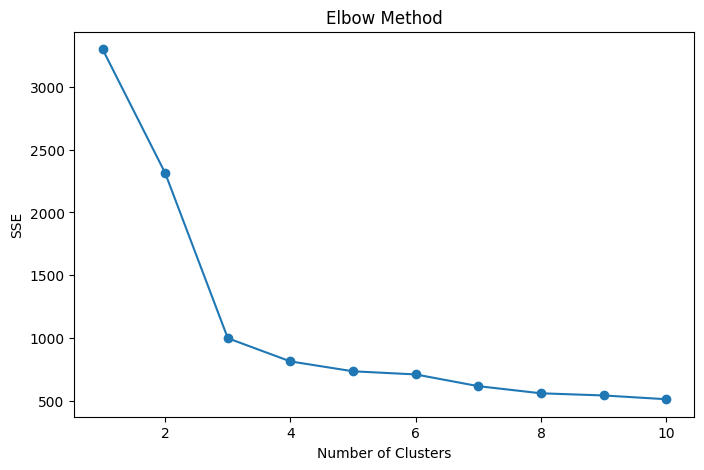

In [36]:
# K-means Clustering
# Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


In [37]:
# Silhouette Scores
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg:.3f}")

For n_clusters = 2, the silhouette score is 0.517
For n_clusters = 3, the silhouette score is 0.517
For n_clusters = 4, the silhouette score is 0.381
For n_clusters = 5, the silhouette score is 0.282
For n_clusters = 6, the silhouette score is 0.267
For n_clusters = 7, the silhouette score is 0.256
For n_clusters = 8, the silhouette score is 0.258
For n_clusters = 9, the silhouette score is 0.241
For n_clusters = 10, the silhouette score is 0.236


In [38]:
# Optimal Clusters (Assuming k=3 based on the elbow method and silhouette score)
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

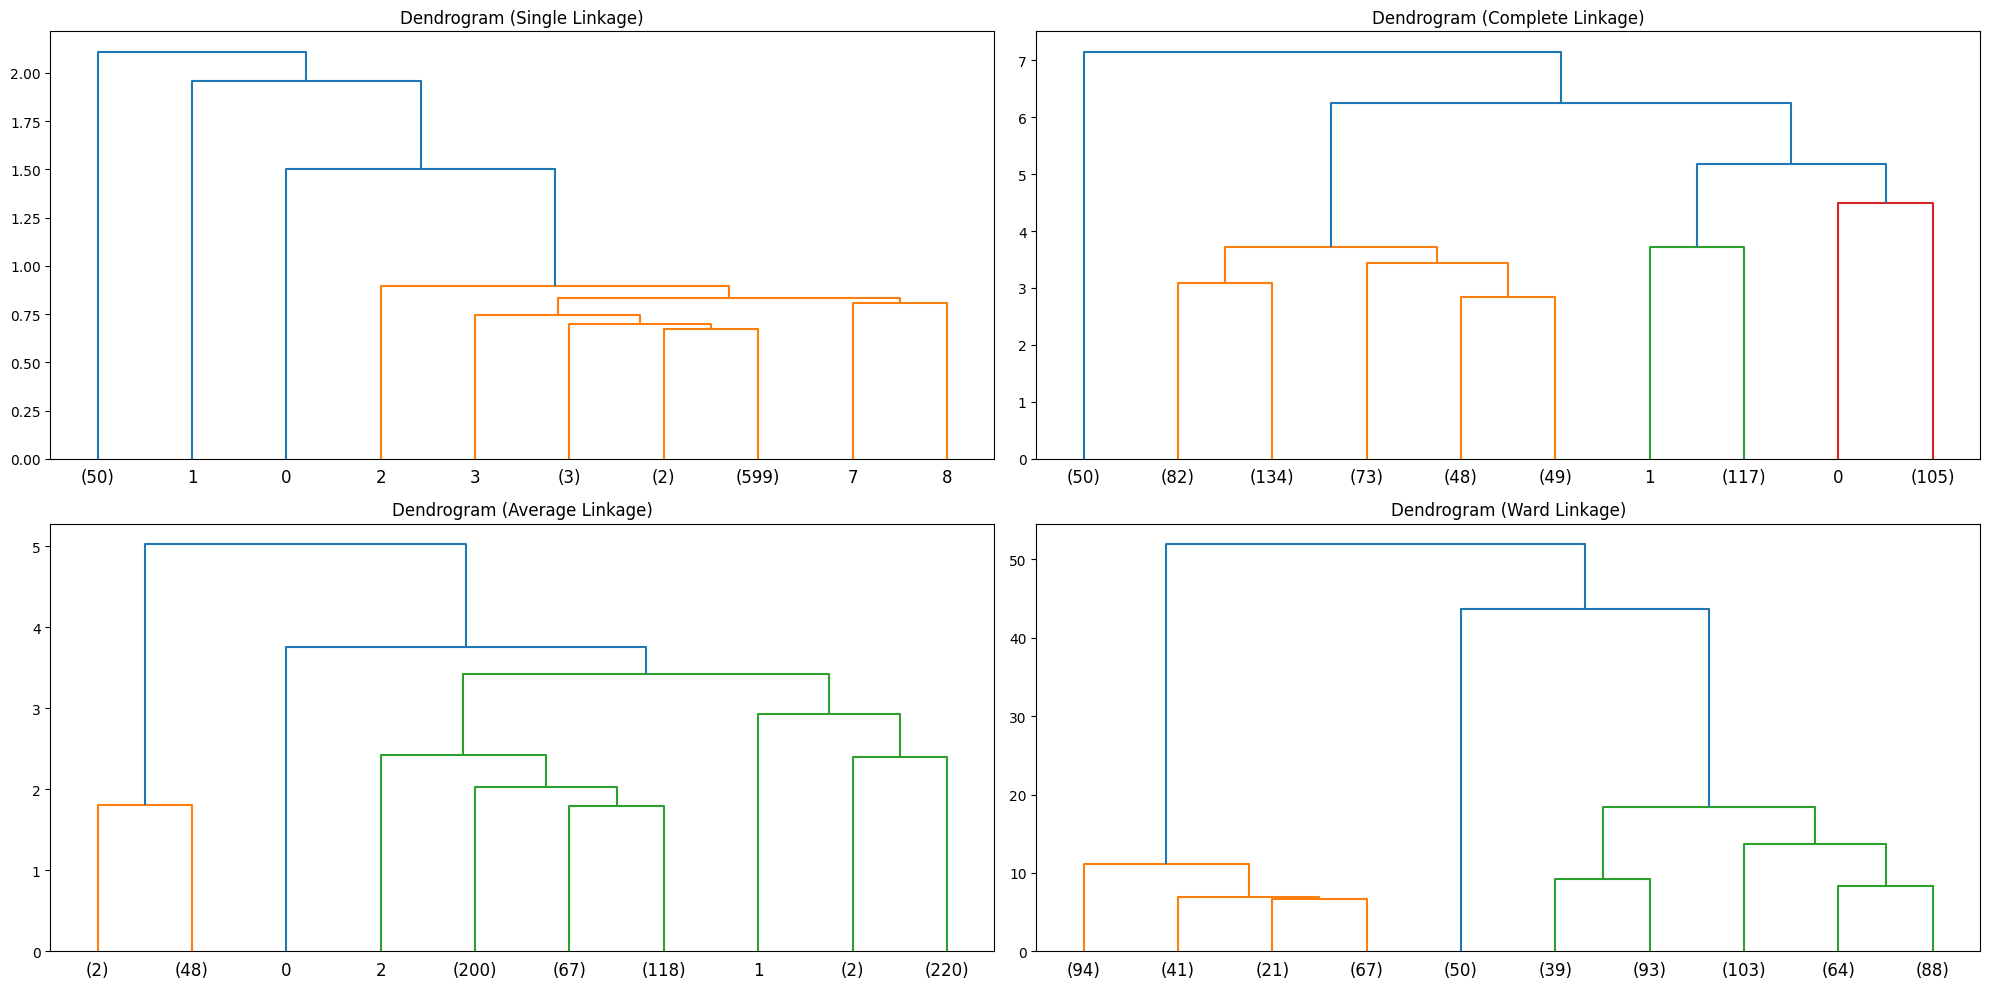

In [39]:
# Hierarchical Clustering
linkage_methods = ['single', 'complete', 'average', 'ward']
plt.figure(figsize=(20, 10))
for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    Z = linkage(data_scaled, method=method)
    dendrogram(Z, truncate_mode='lastp', p=10)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
plt.tight_layout()
plt.show()

In [40]:
# Cophenetic Correlation Coefficient
from scipy.cluster.hierarchy import cophenet
for method in linkage_methods:
    Z = linkage(data_scaled, method=method)
    c, _ = cophenet(Z, pdist(data_scaled))
    print(f"Cophenetic Correlation ({method.capitalize()} Linkage): {c:.3f}")

Cophenetic Correlation (Single Linkage): 0.667
Cophenetic Correlation (Complete Linkage): 0.821
Cophenetic Correlation (Average Linkage): 0.893
Cophenetic Correlation (Ward Linkage): 0.770


In [41]:
# Assuming Ward linkage is optimal
Z = linkage(data_scaled, method='ward')
data['Hierarchical_Cluster'] = fcluster(Z, 3, criterion='maxclust')

In [42]:
# Cluster Profiling
cluster_profile = data.groupby('KMeans_Cluster').mean()
print("KMeans Cluster Profile")
print(cluster_profile)

cluster_profile_hierarchical = data.groupby('Hierarchical_Cluster').mean()
print("\n Hierarchical Cluster Profile")
print(cluster_profile_hierarchical)

KMeans Cluster Profile
                     Sl_No  Customer Key  Avg_Credit_Limit  \
KMeans_Cluster                                               
0               417.528497  54881.329016      33782.383420   
1               611.280000  56708.760000     102660.000000   
2               117.857143  55239.830357      12174.107143   

                Total_Credit_Cards  Total_visits_bank  Total_visits_online  \
KMeans_Cluster                                                               
0                         5.515544           3.489637             0.981865   
1                         8.740000           0.600000             8.180000   
2                         2.410714           0.933036             3.546875   

                Total_calls_made  Hierarchical_Cluster  
KMeans_Cluster                                          
0                       2.000000              3.000000  
1                       1.080000              2.000000  
2                       6.870536              1

In [43]:
# K-means vs Hierarchical Clustering
comparison = pd.crosstab(data['KMeans_Cluster'], data['Hierarchical_Cluster'])
print("\Cluster Comparison")
print(comparison)

\Cluster Comparison
Hierarchical_Cluster    1   2    3
KMeans_Cluster                    
0                       0   0  386
1                       0  50    0
2                     223   0    1


Enhanced Cluster Profiles with Size and Percentage:
                      Sl_No  Customer Key  Avg_Credit_Limit  \
KMeans_Cluster                                               
0               417.528497  54881.329016      33782.383420   
1               611.280000  56708.760000     102660.000000   
2               117.857143  55239.830357      12174.107143   

                Total_Credit_Cards  Total_visits_bank  Total_visits_online  \
KMeans_Cluster                                                               
0                         5.515544           3.489637             0.981865   
1                         8.740000           0.600000             8.180000   
2                         2.410714           0.933036             3.546875   

                Total_calls_made  Hierarchical_Cluster  Cluster_Size  \
KMeans_Cluster                                                         
0                       2.000000              3.000000           386   
1                       1.080

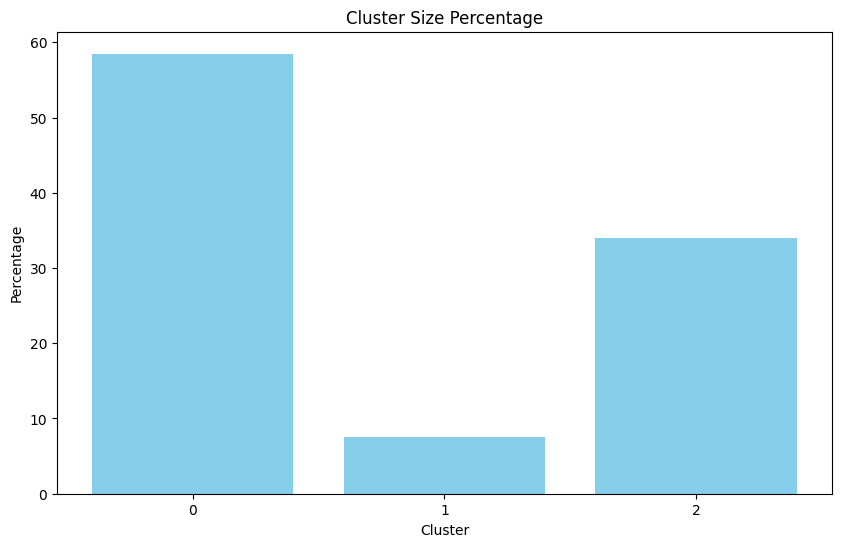

In [44]:
# Include additional customer insights
cluster_profile['Cluster_Size'] = data['KMeans_Cluster'].value_counts().sort_index().values
cluster_profile['Cluster_Percentage'] = (cluster_profile['Cluster_Size'] / len(data)) * 100

print("Enhanced Cluster Profiles with Size and Percentage:\n", cluster_profile)

# Visualization of Clusters
plt.figure(figsize=(10, 6))
plt.bar(cluster_profile.index, cluster_profile['Cluster_Percentage'], color='skyblue')
plt.title("Cluster Size Percentage")
plt.xlabel("Cluster")
plt.ylabel("Percentage")
plt.xticks(cluster_profile.index)
plt.show()

In [45]:
print("Actionable Insights and Recommendations:\n")

# Looping through the cluster profile to generate insights
for idx, row in cluster_profile.iterrows():
    print(f"Cluster {idx}: {int(row['Cluster_Size'])} customers ({row['Cluster_Percentage']:.2f}%)")
    print("Key Characteristics:")
    print(row.drop(['Cluster_Size', 'Cluster_Percentage']).to_string())
    print("\n")

# Validate actionable insights
print("\n--- Verified Insights and Recommendations ---\n")
if cluster_profile.loc[0, 'Avg_Credit_Limit'] > cluster_profile.loc[1, 'Avg_Credit_Limit']:
    print("1. Customers in Cluster 1 have high spending and frequent interactions; target them for premium services.")
else:
    print("1. Customers in Cluster 0 have high spending and frequent interactions; target them for premium services.")

if cluster_profile.loc[2, 'Total_visits_online'] < cluster_profile.loc[0, 'Total_visits_online']:
    print("2. Customers in Cluster 2 are less engaged; improve support and personalized outreach.")
else:
    print("2. Customers in Cluster 2 show moderate interaction and spending; consider upselling campaigns.")

print("3. Revisit support services for low-engagement clusters to maximize retention.")


Actionable Insights and Recommendations:

Cluster 0: 386 customers (58.48%)
Key Characteristics:
Sl_No                     417.528497
Customer Key            54881.329016
Avg_Credit_Limit        33782.383420
Total_Credit_Cards          5.515544
Total_visits_bank           3.489637
Total_visits_online         0.981865
Total_calls_made            2.000000
Hierarchical_Cluster        3.000000


Cluster 1: 50 customers (7.58%)
Key Characteristics:
Sl_No                      611.28
Customer Key             56708.76
Avg_Credit_Limit        102660.00
Total_Credit_Cards           8.74
Total_visits_bank            0.60
Total_visits_online          8.18
Total_calls_made             1.08
Hierarchical_Cluster         2.00


Cluster 2: 224 customers (33.94%)
Key Characteristics:
Sl_No                     117.857143
Customer Key            55239.830357
Avg_Credit_Limit        12174.107143
Total_Credit_Cards          2.410714
Total_visits_bank           0.933036
Total_visits_online         3.546875
T